<a href="https://colab.research.google.com/github/AhmadAlabrash/NLP/blob/main/NLP_ngram_%26_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import sklearn

In [48]:
doc = "We just opened our wings, the flying part is coming soon"

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(1,1))
v.fit_transform([doc],)
v.vocabulary_

{'we': 9,
 'just': 3,
 'opened': 4,
 'our': 5,
 'wings': 10,
 'the': 8,
 'flying': 1,
 'part': 6,
 'is': 2,
 'coming': 0,
 'soon': 7}

In [50]:
v = CountVectorizer(ngram_range=(2,2))
v.fit_transform([doc],)
v.vocabulary_

{'we just': 8,
 'just opened': 3,
 'opened our': 4,
 'our wings': 5,
 'wings the': 9,
 'the flying': 7,
 'flying part': 1,
 'part is': 6,
 'is coming': 2,
 'coming soon': 0}

In [51]:
v = CountVectorizer(ngram_range=(1,2))
v.fit_transform([doc],)
v.vocabulary_

{'we': 17,
 'just': 6,
 'opened': 8,
 'our': 10,
 'wings': 19,
 'the': 15,
 'flying': 2,
 'part': 12,
 'is': 4,
 'coming': 0,
 'soon': 14,
 'we just': 18,
 'just opened': 7,
 'opened our': 9,
 'our wings': 11,
 'wings the': 20,
 'the flying': 16,
 'flying part': 3,
 'part is': 13,
 'is coming': 5,
 'coming soon': 1}

In [52]:
import pandas as pd
df =pd.read_json('/content/news_dataset.json')
df.shape

(12695, 2)

In [53]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [54]:
#to make our dataset balance we will undersampling it to 1381
df1 =df[df.category == 'BUSINESS'].sample(1381)
df2 =df[df.category == 'SPORTS'].sample(1381)
df3 =df[df.category == 'CRIME'].sample(1381)
df4 =df[df.category == 'SCIENCE']

In [55]:
from sklearn.utils import shuffle
df_balanced = pd.concat((df1,df2,df3,df4))

In [56]:
df_balanced

,text,category
2287,The Hottest Cars at the Geneva Auto Show You c...,BUSINESS
1412,Five Tips to Transform Talent in the Workplace...,BUSINESS
10669,Mediation Room At Boston Company Helps Workers...,BUSINESS
535,5 Tech Companies With Fewer Workers Than HP Ju...,BUSINESS
1550,"Finally, Someone Got The Best Of Uber The batt...",BUSINESS
...,...,...
12632,New Continent Zealandia Is Discovered Underwat...,SCIENCE
12644,Smartphone Lovers More Likely To Forget Things...,SCIENCE
12669,Ambitious Test On Tap For Real-Life 'Flying Sa...,SCIENCE
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE


In [61]:
from sklearn.model_selection import train_test_split
X,x,Y,y =train_test_split(df_balanced.text,df_balanced.category ,train_size=0.8,shuffle=True)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [67]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

    BUSINESS       0.75      0.92      0.83       267
       CRIME       0.89      0.92      0.91       290
     SCIENCE       0.93      0.79      0.85       269
      SPORTS       0.92      0.84      0.88       279

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



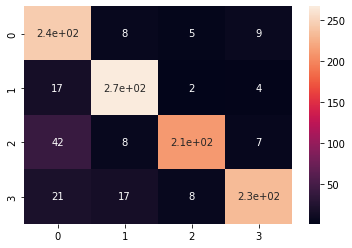

In [68]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('co',CountVectorizer(ngram_range=(1,1))),
    ('nv',MultinomialNB())
])

clf.fit(X,Y)
y_pr = clf.predict(x)

cm = confusion_matrix(y,y_pr)

print(classification_report(y,y_pr))

sns.heatmap(cm , annot=True)

              precision    recall  f1-score   support

    BUSINESS       0.68      0.94      0.79       267
       CRIME       0.92      0.91      0.92       290
     SCIENCE       0.93      0.74      0.82       269
      SPORTS       0.94      0.79      0.86       279

    accuracy                           0.85      1105
   macro avg       0.87      0.84      0.85      1105
weighted avg       0.87      0.85      0.85      1105



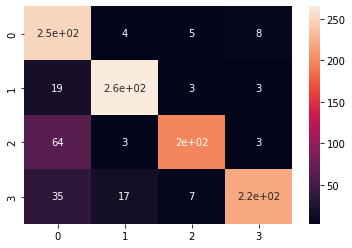

In [69]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('co',CountVectorizer(ngram_range=(1,2))),
    ('nv',MultinomialNB())
])

clf.fit(X,Y)
y_pr = clf.predict(x)

cm = confusion_matrix(y,y_pr)

print(classification_report(y,y_pr))

sns.heatmap(cm , annot=True)

              precision    recall  f1-score   support

    BUSINESS       0.58      0.85      0.69       267
       CRIME       0.84      0.77      0.80       290
     SCIENCE       0.76      0.67      0.71       269
      SPORTS       0.83      0.64      0.72       279

    accuracy                           0.73      1105
   macro avg       0.75      0.73      0.73      1105
weighted avg       0.76      0.73      0.73      1105



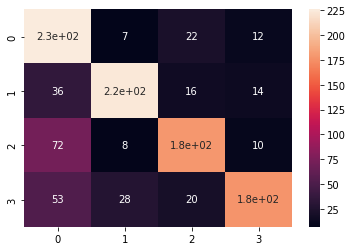

In [70]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('co',CountVectorizer(ngram_range=(2,2))),
    ('nv',MultinomialNB())
])

clf.fit(X,Y)
y_pr = clf.predict(x)

cm = confusion_matrix(y,y_pr)

print(classification_report(y,y_pr))

sns.heatmap(cm , annot=True)